# Qian Zhang
## ML Individual Homework 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Create the dataframe

In [2]:
xi = np.array([[1,1,1,5,2,6,4],[4,3,2,1,3,2,1]])
xi = np.transpose(xi)
xi_pd = pd.DataFrame(data=xi,columns=['x1','x2'])
xi_pd

,x1,x2
0,1,4
1,1,3
2,1,2
3,5,1
4,2,3
5,6,2
6,4,1


# Question 1

Text(0, 0.5, 'x2')

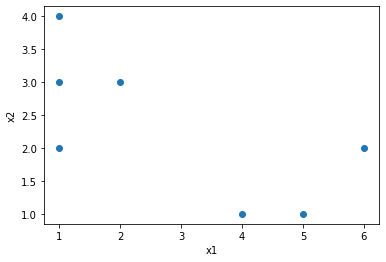

In [3]:
x = xi_pd.x1
y = xi_pd.x2
plt.scatter(x,y)
plt.xlabel('x1')
plt.ylabel('x2')

In [4]:
# Normalise the samples. Since there is no outliers, I will use Min-max normalisation
def min_max_normlisation(x_column):
    normalised_x_column = []
    min_x = x_column.min()
    max_x = x_column.max()
    for x in x_column:
        normalised_x_column.append((x-min_x)/(max_x - min_x))
    return normalised_x_column
normalised_x1 = min_max_normlisation(xi_pd.x1)
normalised_x2 = min_max_normlisation(xi_pd.x2)
normalised_x = np.transpose(np.array([normalised_x1,normalised_x2]))
xi_normalised_pd = pd.DataFrame(data = normalised_x,columns=['Normalised_x1','Normalised_x2'])

# Question 2 

In [5]:
xi_normalised_pd_Q2 = xi_normalised_pd.copy()

In [6]:
# Toss a coin 7 times to initialise the label.
label = []
for n in range(0,7):
    label.append(random.randint(0,1))
xi_normalised_pd_Q2['Label'] = label
xi_normalised_pd_Q2['Point'] = xi_normalised_pd_Q2.apply(lambda row: [row.Normalised_x1,row.Normalised_x2],axis=1)
xi_normalised_pd_Q2

,Normalised_x1,Normalised_x2,Label,Point
0,0.0,1.000000,0,"[0.0, 1.0]"
1,0.0,0.666667,0,"[0.0, 0.6666666666666666]"
2,0.0,0.333333,1,"[0.0, 0.3333333333333333]"
3,0.8,0.000000,0,"[0.8, 0.0]"
4,0.2,0.666667,1,"[0.2, 0.6666666666666666]"
5,1.0,0.333333,1,"[1.0, 0.3333333333333333]"
6,0.6,0.000000,0,"[0.6, 0.0]"


In [7]:
# Write function to calculate the centroids of each cluster
def calculate_the_centroids(xi_normalised_pd_Q2):
    centroids = xi_normalised_pd_Q2.groupby(['Label']).mean().rename(columns={'Normalised_x1':'Centroids_x1','Normalised_x2':'Centroids_x2'})
    centroids_0 = list(centroids.iloc[0])
    centroids_1 = list(centroids.iloc[1])
    return centroids_0,centroids_1

In [8]:
# Write function to return the closest centrods
def calculate_the_distance(point_1,point_2):
    point_1_x = point_1[0]
    point_1_y = point_1[1]    
    point_2_x = point_2[0]    
    point_2_y = point_2[1]   
    return np.sqrt(np.square(point_1_x-point_2_x) + np.square(point_1_y-point_2_y))

def calculate_the_closet_centroids(point,centroid_0,centroid_1):
    distance_centroid_0 = calculate_the_distance(point,centroid_0)
    distance_centroid_1 = calculate_the_distance(point,centroid_1)
    if distance_centroid_1 < distance_centroid_0:
        return 1
    else:
        return 0

In [9]:
# Write function to return whetherthe clusters changes
def whether_clusters_no_longer_change(pd1,pd2):
    return pd1.Label.equals(pd2.Label)

In [10]:
# Main Scripts
xi_normalised_pd_Q2_old = xi_normalised_pd_Q2.copy()
xi_normalised_pd_Q2_new = xi_normalised_pd_Q2.copy()

centroids_0,centroids_1 = calculate_the_centroids(xi_normalised_pd_Q2_old)
xi_normalised_pd_Q2_new['Label'] = xi_normalised_pd_Q2_new.apply(lambda row:calculate_the_closet_centroids(row['Point'],centroids_0,centroids_1),axis=1)


while not whether_clusters_no_longer_change(xi_normalised_pd_Q2_old,xi_normalised_pd_Q2_new):
    xi_normalised_pd_Q2_old = xi_normalised_pd_Q2_new.copy()
    centroids_0,centroids_1 = calculate_the_centroids(xi_normalised_pd_Q2_old)
    xi_normalised_pd_Q2_new['Label'] = xi_normalised_pd_Q2_new.apply(lambda row:calculate_the_closet_centroids(row['Point'],centroids_0,centroids_1),axis=1)

In [11]:
xi_normalised_pd_Q2_new

,Normalised_x1,Normalised_x2,Label,Point
0,0.0,1.000000,0,"[0.0, 1.0]"
1,0.0,0.666667,0,"[0.0, 0.6666666666666666]"
2,0.0,0.333333,0,"[0.0, 0.3333333333333333]"
3,0.8,0.000000,1,"[0.8, 0.0]"
4,0.2,0.666667,0,"[0.2, 0.6666666666666666]"
5,1.0,0.333333,1,"[1.0, 0.3333333333333333]"
6,0.6,0.000000,1,"[0.6, 0.0]"


#### Therefore, point 1, 2, 3, 5 are in one cluster, and point 4,6,7 are in the other cluster

# Question 3

In [12]:
xi_normalised_pd_Q3 = xi_normalised_pd.copy()
xi_normalised_pd_Q3['Point'] = xi_normalised_pd_Q3.apply(lambda row: [row.Normalised_x1,row.Normalised_x2],axis=1)

In [13]:
xi_normalised_pd_Q3['Label'] = xi_normalised_pd_Q3.index.values
xi_normalised_pd_Q3

,Normalised_x1,Normalised_x2,Point,Label
0,0.0,1.000000,"[0.0, 1.0]",0
1,0.0,0.666667,"[0.0, 0.6666666666666666]",1
2,0.0,0.333333,"[0.0, 0.3333333333333333]",2
3,0.8,0.000000,"[0.8, 0.0]",3
4,0.2,0.666667,"[0.2, 0.6666666666666666]",4
5,1.0,0.333333,"[1.0, 0.3333333333333333]",5
6,0.6,0.000000,"[0.6, 0.0]",6


In [14]:
# Write function to calculate the centroids of each cluster
def calculate_the_centroids(xi_normalised_pd_Q3):
    centroids = xi_normalised_pd_Q3.groupby(['Label']).mean().rename(columns={'Normalised_x1':'Centroids_x1','Normalised_x2':'Centroids_x2'})
    return centroids[['Centroids_x1','Centroids_x2']].to_numpy()

In [15]:
# Write function to return the two clusters with the cloest distance
def return_the_cloest_cluster(xi_normalised_pd_Q3):
    centroids = calculate_the_centroids(xi_normalised_pd_Q3)
    number_of_cluster = len(xi_normalised_pd_Q3.Label.unique())
    distance_matrix = np.identity(number_of_cluster)
    distance_matrix[distance_matrix==1] = float('inf')
    for i in range(len(centroids)):
        for j in range(len(centroids)):
            if i != j:
                distance_matrix[i][j] = calculate_the_distance(centroids[i],centroids[j])
    return np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)

In [16]:
def function_merge_two_clusters(xi_normalised_pd_Q3_old):
    xi_normalised_pd_Q3_new = xi_normalised_pd_Q3_old.copy()
    closest_clusters = return_the_cloest_cluster(xi_normalised_pd_Q3_new)
    xi_normalised_pd_Q3_new.loc[xi_normalised_pd_Q3_new.Label ==  closest_clusters[1],'Label'] = closest_clusters[0]  
    
    for Count,Label in enumerate(xi_normalised_pd_Q3_new.Label.unique()):
        xi_normalised_pd_Q3_new.loc[xi_normalised_pd_Q3_new.Label==Label,'Label'] = Count
        
    return xi_normalised_pd_Q3_new

In [17]:
normalised_list = []

xi_normalised_pd_Q3_old = xi_normalised_pd_Q3.copy()
normalised_list.append(list(xi_normalised_pd_Q3_old.Label))
xi_normalised_pd_Q3_new = function_merge_two_clusters(xi_normalised_pd_Q3_old)
xi_normalised_pd_Q3_old = xi_normalised_pd_Q3_new.copy()
normalised_list.append(list(xi_normalised_pd_Q3_new.Label))
while len(xi_normalised_pd_Q3_new.Label.unique()) > 1:
    xi_normalised_pd_Q3_new = function_merge_two_clusters(xi_normalised_pd_Q3_old)
    xi_normalised_pd_Q3_old = xi_normalised_pd_Q3_new.copy()
    normalised_list.append(list(xi_normalised_pd_Q3_new.Label))

In [18]:
normalised_list

[[0, 1, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 1, 4, 5],
 [0, 1, 2, 3, 1, 4, 3],
 [0, 1, 1, 2, 1, 3, 2],
 [0, 1, 1, 2, 1, 2, 2],
 [0, 0, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0]]

#### Initial: [1],[2],[3],[4],[5],[6],[7]
#### First iteration: [1],[2,5],[3],[4],[6],[7]
#### Second iteration: [1],[2,5],[3],[4,7],[6]
#### Third iteration: [1],[2,3,5],[4,7],[6]
#### Fourth iteration: [1],[2,3,5],[4,6,7]
#### Fifth iteration: [1,2,3,5],[4,6,7]
#### Sixth iteration: [1,2,3,4,5,6,7]